## Linear Regression 

The model is a function which maps from `x` to `y`.
It is represented by:
    $$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("advertising.csv");
print(df.head());

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


### Features

Input feature - TV, Radio, Newspaper <br>
Predicted - Sales

In [3]:
x = df[["TV", "Radio", "Newspaper"]].values;
y = df["Sales"].values;




In [4]:
'''
test-size -> refers to the %split of test and train , 0.2 means 20% for test and rest 80% for train
random_state = 42 -> random_state refers to the randomness so the split is reproducible
                i.e. it does not with every run
'''

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42);


In [5]:
'''
np.c_ -> used for concatenating
np.ones((x.shape[0], 1)) creates a col of (n, 1)
it prepends to the parameter vector
'''
def add_bias(x):
    return np.c_[np.ones((x.shape[0], 1)), x]

mean_train = x_train.mean(axis = 0);
std_train = x_train.std(axis = 0);

'''
In real world scenario - test set is unseen but while training it can be seen, known as data leakage
Therefore using mean train as the same transformation will be applied to both.
'''

x_train_s = (x_train - mean_train)/std_train;
x_test_s = (x_test - mean_train)/std_train;

x_train_b = add_bias(x_train_s);
x_test_b = add_bias(x_test_s);


In [6]:
'''
COST FUNCTION: 
n->no. of samples
theta -> parameter vector, 1st col is bias b and rest are weights w
'''

def calc_cost(x_b, y, theta):
    n = len(y);
    prediction = x_b.dot(theta);
    loss = prediction - y;
    
    cost = ((1/(2*n))* np.sum(loss**2));
    return  cost;

In [7]:
'''
GRADIENT DESCENT: 
x_b -> training feature with bias
y -> target values
theta_init -> initial w, b
lr -> learning rate
epochs -> iterations for which gradient descent will converge
tol -> tolerance for early stopping (if cost change is tiny)
verbose -> true then prints progress
'''
def gradient_descent(x_b, y, theta_init, lr=0.01, epochs=2000, tol=None, verbose=False):
    theta = theta_init.copy();
    n = len(y);
    cost_history = [];
    theta_history = [];
    
    for i in range(epochs):
        predicted = x_b.dot(theta);
        error = predicted - y;
        
        #x_b.T -> Transpose of x_b
        gradient = (1/n)*(x_b.T.dot(error));
        
        #Updation
        theta -= lr*gradient;
        
        cost = calc_cost(x_b, y, theta);
        
        cost_history.append(cost);
        theta_history.append(theta.copy());
        
        if verbose and (i % max(1, epochs//10) == 0):
            print(f"iter {i:>5d} | cost: {cost:.6f}")

        #tolerance-based early stopping
        if tol is not None and i > 0:
            if abs(cost_history[-2] - cost_history[-1]) < tol:
                if verbose:
                    print(f"Stopping early at iter {i}, cost change < tol ({tol})")
                break

    return theta, np.array(cost_history), np.array(theta_history)


### Training: 
1. Gradient Descent
2. Normalization equation
3. Scikit Learn 



In [ ]:
'''
1. Gradient Descent
'''
n_features = x_train_b.shape[1];
theta0 = np.zeros(n_features);

learning_rate = 0.01;
epochs = 5000;
tol = 1e-9;
verbose = True;

#Gradient descent
theta_gd, cost_hist, theta_hist = gradient_descent(x_train_b, y_train, theta0, learning_rate, epochs, tol, verbose);

print("\nLearned theta (GD):", theta_gd)
print("Final training cost (GD):", cost_hist[-1])

iter     0 | cost: 128.321512
iter   500 | cost: 1.343812
iter  1000 | cost: 1.338072
Stopping early at iter 1188, cost change < tol (1e-09)

Learned theta (GD): [15.33052596  4.58720819  1.48949835  0.08826047]
Final training cost (GD): 1.3380714038686097


In [9]:
y_train_pred = x_train_b.dot(theta_gd);
y_test_pred = x_test_b.dot(theta_gd);

print("\n==== GD Performance ====")
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R2:",  r2_score(y_train, y_train_pred))
print("Test  MSE:", mean_squared_error(y_test, y_test_pred))
print("Test  R2:",  r2_score(y_test, y_test_pred))


==== GD Performance ====
Train MSE: 2.676142807737219
Train R2: 0.9001415948415062
Test  MSE: 2.908085150099685
Test  R2: 0.905890562145047


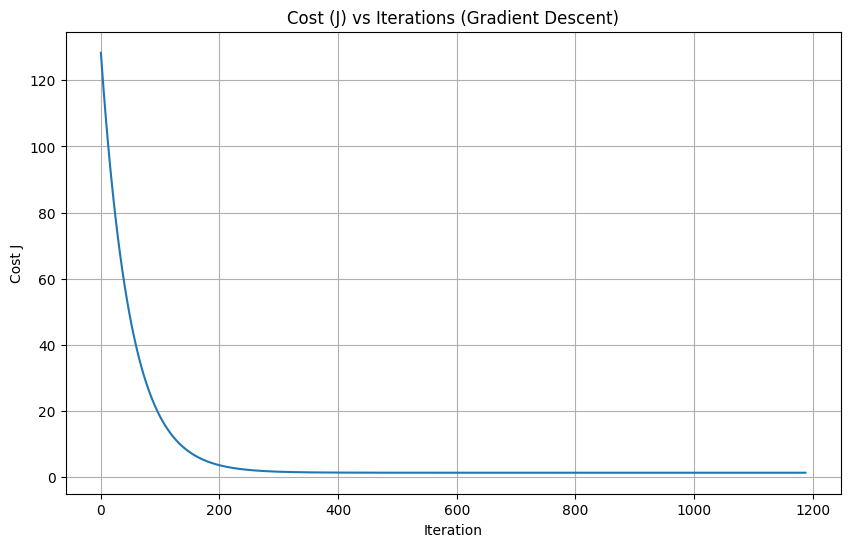

In [10]:
#Visualization 
plt.figure(figsize=(10, 6))
plt.plot(cost_hist)
plt.title("Cost (J) vs Iterations (Gradient Descent)")
plt.xlabel("Iteration")
plt.ylabel("Cost J")
plt.grid(True)
plt.show()

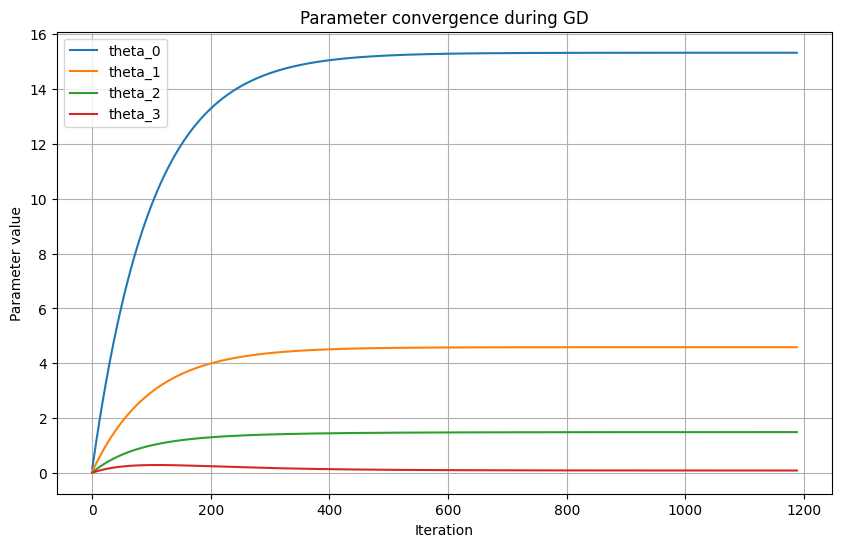

In [11]:
plt.figure(figsize=(10, 6))
theta_hist = np.array(theta_hist)   # shape: (iters, n_params)
for i in range(theta_hist.shape[1]):
    plt.plot(theta_hist[:, i], label=f"theta_{i}")
    
plt.title("Parameter convergence during GD")
plt.xlabel("Iteration")
plt.ylabel("Parameter value")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
'''
1. Gradient Descent - if slight changed  initial parameters
'''
n_features = x_train_b.shape[1];
theta1 = np.ones(n_features);

learning_rate = 0.01;
epochs = 5000;
tol = 1e-9;
verbose = True;

#Gradient descent
theta_gd, cost_hist, theta_hist = gradient_descent(x_train_b, y_train, theta1, learning_rate, epochs, tol, verbose);

print("\nLearned theta (GD):", theta_gd)
print("Final training cost (GD):", cost_hist[-1])

iter     0 | cost: 108.672854
iter   500 | cost: 1.343094
iter  1000 | cost: 1.338072
Stopping early at iter 1198, cost change < tol (1e-09)

Learned theta (GD): [15.33054127  4.5872166   1.48949195  0.08826548]
Final training cost (GD): 1.3380714048225564


In [13]:
y_train_pred = x_train_b.dot(theta_gd);
y_test_pred = x_test_b.dot(theta_gd);

print("\n==== GD Performance ====")
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R2:",  r2_score(y_train, y_train_pred))
print("Test  MSE:", mean_squared_error(y_test, y_test_pred))
print("Test  R2:",  r2_score(y_test, y_test_pred))


==== GD Performance ====
Train MSE: 2.6761428096451128
Train R2: 0.9001415947703145
Test  MSE: 2.9081043213642666
Test  R2: 0.9058899417378583


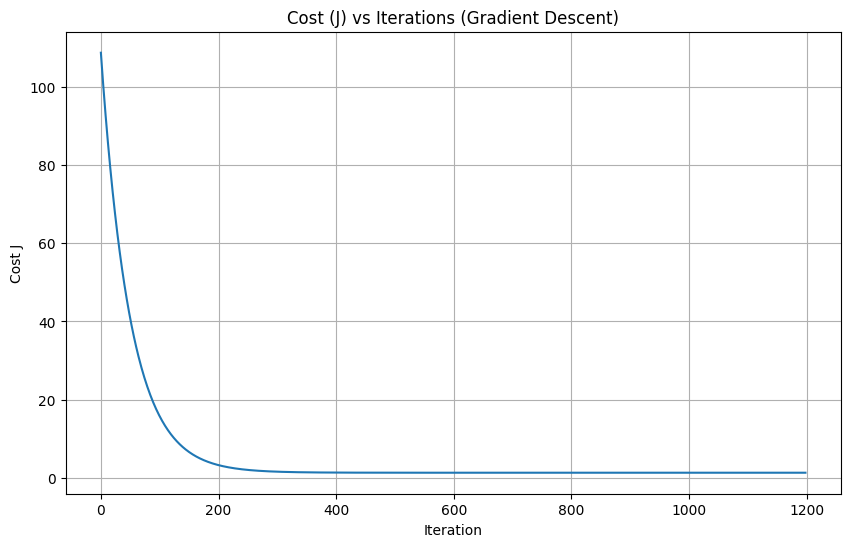

In [14]:
#Visualization 
plt.figure(figsize=(10, 6))
plt.plot(cost_hist)
plt.title("Cost (J) vs Iterations (Gradient Descent)")
plt.xlabel("Iteration")
plt.ylabel("Cost J")
plt.grid(True)
plt.show()

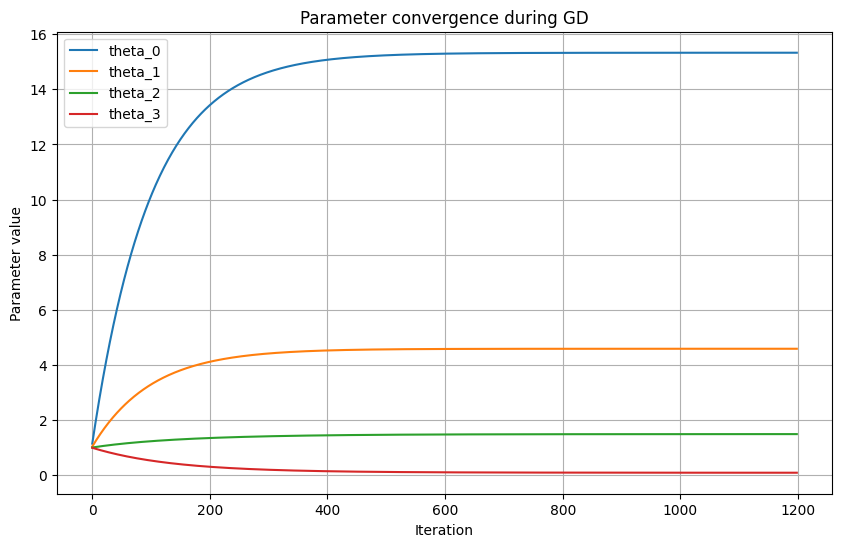

In [15]:
plt.figure(figsize=(10, 6))
theta_hist = np.array(theta_hist)   # shape: (iters, n_params)
for i in range(theta_hist.shape[1]):
    plt.plot(theta_hist[:, i], label=f"theta_{i}")
    
plt.title("Parameter convergence during GD")
plt.xlabel("Iteration")
plt.ylabel("Parameter value")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
'''
Closed Form: Normal Form:
linalg - linear algebra library
pinv - pseudo inverse
'''

theta_closed = (np.linalg.pinv(x_train_b.T.dot(x_train_b))).dot(x_train_b.T.dot(y_train));
print("\nClosed-form theta:", theta_closed);


Closed-form theta: [15.330625    4.58720774  1.48984025  0.08791597]


In [20]:
y_test_pred_closed = x_test_b.dot(theta_closed);
print("\n==== Closed-form Performance ====")
print("Test  MSE:", mean_squared_error(y_test, y_test_pred_closed))
print("Test  R2:",  r2_score(y_test, y_test_pred_closed))


==== Closed-form Performance ====
Test  MSE: 2.9077569102710883
Test  R2: 0.9059011844150827


In [ ]:
'''
SCIKIT LEARN Library:

Training - lr_model.fit()

b -> lr_model.intercept
w->weights -> lr_model.coef

Predicting - lr_model.predict()
'''

lr_model = LinearRegression();

# Training on scaled features with no bias column added
lr_model.fit(x_train_s, y_train);

print("\nSklearn intercept:", lr_model.intercept_)
print("Sklearn coef (for scaled features):", lr_model.coef_)


Sklearn intercept: 15.330625000000001
Sklearn coef (for scaled features): [4.58720774 1.48984025 0.08791597]


In [22]:
y_test_pred_sklearn = lr_model.predict(x_test_s);

print("Test  MSE:", mean_squared_error(y_test, y_test_pred_sklearn))
print("Test  R2:",  r2_score(y_test, y_test_pred_sklearn))


Test  MSE: 2.9077569102710905
Test  R2: 0.9059011844150826


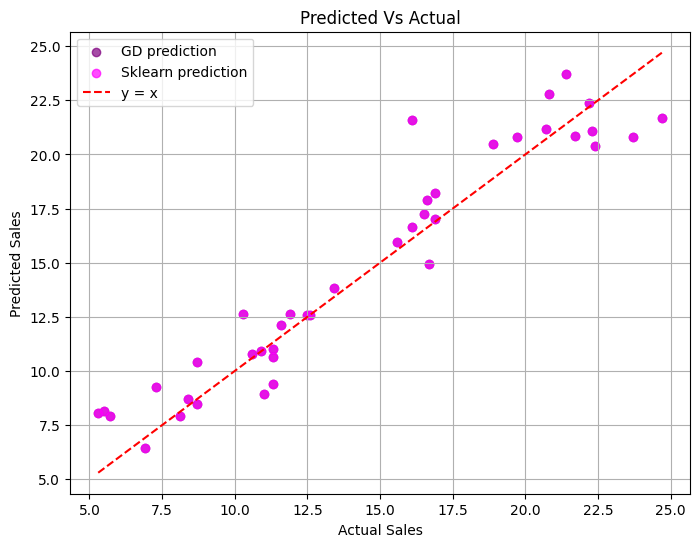

In [45]:
'''
Predicted vs Actual

overlapping 
'''

plt.figure(figsize=(8, 6));
plt.scatter(y_test, y_test_pred, alpha = 0.7, label = "GD prediction", color = "purple");
plt.scatter(y_test, y_test_pred_sklearn, alpha = 0.7, label = "Sklearn prediction", color = "magenta");

mn = min(y_test.min(), y_test_pred.min(), y_test_pred_sklearn.min());
mx = max(y_test.max(), y_test_pred.max(), y_test_pred_sklearn.max());

plt.plot([mn, mx], [mn, mx],  'r--', label = "y = x");
plt.xlabel("Actual Sales");
plt.ylabel("Predicted Sales");
plt.legend();
plt.title("Predicted Vs Actual");
plt.legend();
plt.grid(True);
plt.show();

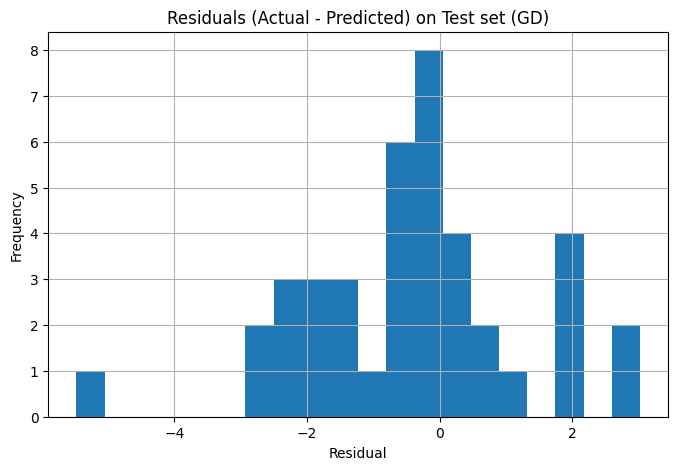

In [31]:
# Residuals histogram (test set for GD)
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=20)
plt.title("Residuals (Actual - Predicted) on Test set (GD)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#### Visualization of how much each column is effected (Partial Dependency Plot)

In [35]:
tv_mean = mean_train[0];
radio_mean = mean_train[1];
news_mean = mean_train[2];

tv_s = (tv_mean - mean_train[0])/std_train[0];
radio_s = (radio_mean - mean_train[1])/std_train[1];
news_s = (news_mean - mean_train[2])/std_train[2];

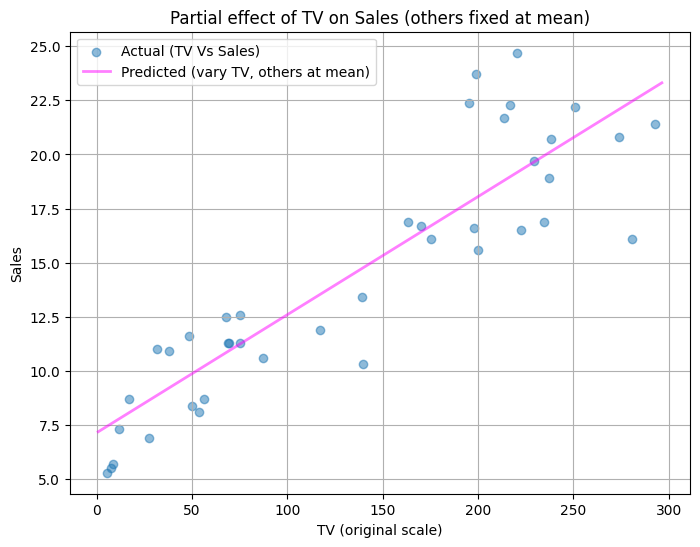

In [41]:
#Creates 100 evenly spaced between the given range
tv_range = np.linspace(x[:,0].min(), x[:,0].max(), 100)

#Keeping others as constant
tv_scaled = (tv_range - mean_train[0])/std_train[0];
others = [radio_s, news_s];

x_tv_pd = np.c_[np.ones((len(tv_range), 1)), tv_scaled, np.full(len(tv_range), others[0]), np.full(len(tv_range), others[1])];
y_tv_pd = x_tv_pd.dot(theta_gd);

plt.figure(figsize=(8, 6));
plt.scatter(x_test[:, 0], y_test, alpha =0.5, label = "Actual (TV Vs Sales)");
plt.plot(tv_range, y_tv_pd, color='magenta', alpha =0.5, linewidth=2, label="Predicted (vary TV, others at mean)");
plt.xlabel("TV (original scale)");
plt.ylabel("Sales");
plt.title("Partial effect of TV on Sales (others fixed at mean)");
plt.legend();
plt.grid(True);
plt.show();

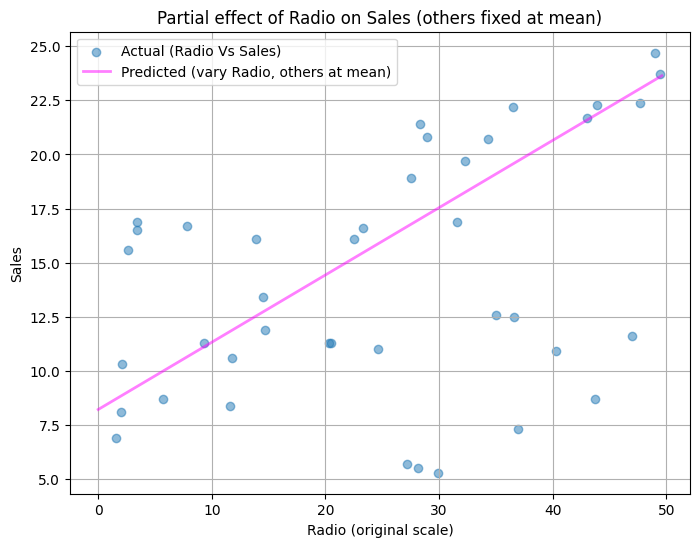

In [42]:
#Creates 100 evenly spaced between the given range
radio_range = np.linspace(x[:,1].min(), x[:,1].max(), 100)

#Keeping others as constant
radio_scaled = (radio_range - mean_train[1])/std_train[1];
others = [tv_s, news_s];

x_radio_pd = np.c_[np.ones((len(radio_range), 1)), radio_scaled, np.full(len(radio_range), others[0]), np.full(len(radio_range), others[1])];
y_radio_pd = x_radio_pd.dot(theta_gd);

plt.figure(figsize=(8, 6));
plt.scatter(x_test[:, 1], y_test, alpha =0.5, label = "Actual (Radio Vs Sales)");
plt.plot(radio_range, y_radio_pd, color='magenta', alpha =0.5, linewidth=2, label="Predicted (vary Radio, others at mean)");
plt.xlabel("Radio (original scale)");
plt.ylabel("Sales");
plt.title("Partial effect of Radio on Sales (others fixed at mean)");
plt.legend();
plt.grid(True);
plt.show();

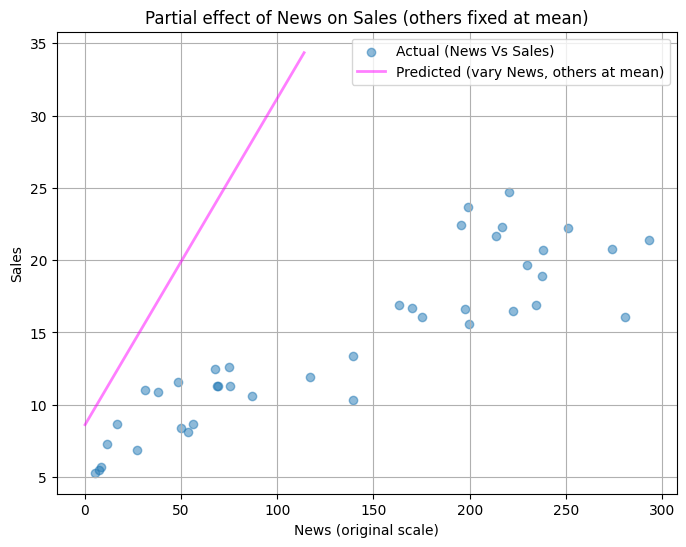

In [ ]:
#Creates 100 evenly spaced between the given range 
news_range = np.linspace(x[:,2].min(), x[:,2].max(), 100)

#Keeping others as constant
news_scaled = (news_range - mean_train[2])/std_train[2];
others = [tv_s, radio_s];

x_news_pd = np.c_[np.ones((len(news_range), 1)), news_scaled, np.full(len(news_range), others[0]), np.full(len(news_range), others[1])];
y_news_pd = x_news_pd.dot(theta_gd);

plt.figure(figsize=(8, 6));
plt.scatter(x_test[:, 0], y_test, alpha =0.5, label = "Actual (News Vs Sales)");
plt.plot(news_range, y_news_pd, color='magenta', alpha =0.5, linewidth=2, label="Predicted (vary News, others at mean)");
plt.xlabel("News (original scale)");
plt.ylabel("Sales");
plt.title("Partial effect of News on Sales (others fixed at mean)");
plt.legend();
plt.grid(True);
plt.show();

News has the least effect on ads <br>
Radio has slightly greater than news <br>
TV has the most effect on sales

## Linear Regression Completed Successfully